# PERM Acceptance Rate Nation by Nation 2009 - 2016
## Regardless of their profession or the company they are applying to

## Questions:
### A TOTALS
    1. Applications total, year by year
    2. Acceptance rate total, year by year
### B NATION BREAK DOWN
    1. Top nations. (Which are the 10 largest groups? Do they vary over the years?)
    2. Acceptance rate by nation total. And year by year.
### C JOBS OF TOP/BOTTOM NATIONS
    1. Jobs of top nations excepted, graph it somehow
    2. Jobs of bottom nations excepted, graph it somehow
    3. Mark amount of Green Cards excepted/rejected in the Bar Graph
### D VISA PREDICTOR

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import urllib
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

%matplotlib inline

# Importing and prepping all of the data

In [ ]:
df = pd.read_excel("data/PERM_2015.xls")
df_2014 = pd.read_excel("data/PERM_2014.xls")
df_2013 = pd.read_excel("data/PERM_2013.xls")
df_2012 = pd.read_excel("data/PERM_2012.xls")
df_2011 = pd.read_excel("data/PERM_2011.xls")
df_2010 = pd.read_excel("data/PERM_2010.xls")
df_2009 = pd.read_excel("data/PERM_2009.xls")

[A link](https://docs.google.com/a/tamedia.com/spreadsheets/d/1lbmWfRqyOPvxiwkaC-XVgE5ClfqjNe9J-zSSe7GbVGQ/edit?usp=sharing) to the exact names of the colums I'll be using. They differ from year to year.

In [ ]:
df_2009.info()

In [ ]:
#Pulling out all the relevant columns, have to 
df_2015 = df[["CASE_NUMBER","DECISION_DATE","CASE_STATUS","EMPLOYER_NAME","EMPLOYER_STATE","PW_UNIT_OF_PAY_9089","WAGE_OFFER_FROM_9089","PW_SOC_CODE","COUNTRY_OF_CITIZENSHIP"]].copy()
df_2014 = df_2014[["CASE_NO","Decision_Date","Case_Status","Employer_Name","Employer_State","PW_UNIT_OF_PAY_9089","WAGE_OFFERED_FROM_9089","PW_SOC_Code","Country_of_Citizenship"]].copy()
df_2013 = df_2013[["CASE_NO","Decision_Date","Case_Status","Employer_Name","Employer_State","PW_Unit_of_Pay_9089","WAGE_OFFERED_FROM_9089","PW_SOC_Code","Country_of_Citizenship"]].copy()
df_2012 = df_2012[["CASE_NO","DECISION_DATE","CASE_STATUS","EMPLOYER_NAME","EMPLOYER_STATE","PW_UNIT_OF_PAY_9089","WAGE_OFFER_FROM_9089","PW_SOC_CODE","COUNTRY_OF_CITZENSHIP"]].copy()
df_2011 = df_2011[["CASE_NO","DECISION_DATE","CASE_STATUS","EMPLOYER_NAME","EMPLOYER_STATE","PW_UNIT_OF_PAY_9089","WAGE_OFFER_FROM_9089","PW_SOC_CODE","COUNTRY_OF_CITZENSHIP"]].copy()
df_2010 = df_2010[["CASE_NO","DECISION_DATE","CASE_STATUS","EMPLOYER_NAME","EMPLOYER_STATE","PW_UNIT_OF_PAY_9089","WAGE_OFFER_FROM_9089","PW_SOC_CODE","COUNTRY_OF_CITZENSHIP"]].copy()
df_2009 = df_2009[["CASE_NUMBER","DECISION DATE","CASE STATUS","EMPLOYER NAME","EMPLOYER STATE","PW UNIT OF PAY 9089","WAGE OFFER FROM 9089","PW SOC CODE","COUNTRY OF CITZENSHIP"]].copy()

In [ ]:
#Renaming the columns
df_2015.columns = ["CASE_NUMBER","DECISION_DATE","CASE_STATUS","EMPLOYER_NAME","EMPLOYER_STATE","PW_UNIT_OF_PAY_9089","WAGE_OFFER_FROM_9089","SOC_CODE","COUNTRY_OF_CITZENSHIP"]
df_2014.columns = ["CASE_NUMBER","DECISION_DATE","CASE_STATUS","EMPLOYER_NAME","EMPLOYER_STATE","PW_UNIT_OF_PAY_9089","WAGE_OFFER_FROM_9089","SOC_CODE","COUNTRY_OF_CITZENSHIP"]
df_2013.columns = ["CASE_NUMBER","DECISION_DATE","CASE_STATUS","EMPLOYER_NAME","EMPLOYER_STATE","PW_UNIT_OF_PAY_9089","WAGE_OFFER_FROM_9089","SOC_CODE","COUNTRY_OF_CITZENSHIP"]
df_2012.columns = ["CASE_NUMBER","DECISION_DATE","CASE_STATUS","EMPLOYER_NAME","EMPLOYER_STATE","PW_UNIT_OF_PAY_9089","WAGE_OFFER_FROM_9089","SOC_CODE","COUNTRY_OF_CITZENSHIP"]
df_2011.columns = ["CASE_NUMBER","DECISION_DATE","CASE_STATUS","EMPLOYER_NAME","EMPLOYER_STATE","PW_UNIT_OF_PAY_9089","WAGE_OFFER_FROM_9089","SOC_CODE","COUNTRY_OF_CITZENSHIP"]
df_2010.columns = ["CASE_NUMBER","DECISION_DATE","CASE_STATUS","EMPLOYER_NAME","EMPLOYER_STATE","PW_UNIT_OF_PAY_9089","WAGE_OFFER_FROM_9089","SOC_CODE","COUNTRY_OF_CITZENSHIP"]
df_2009.columns = ["CASE_NUMBER","DECISION_DATE","CASE_STATUS","EMPLOYER_NAME","EMPLOYER_STATE","PW_UNIT_OF_PAY_9089","WAGE_OFFER_FROM_9089","SOC_CODE","COUNTRY_OF_CITZENSHIP"]

In [ ]:
#joining them them all the tables:
df= pd.concat([df_2015, df_2014, df_2013, df_2012, df_2011, df_2010, df_2009], ignore_index=True)

In [438]:
#df.to_csv('visa_applications_2009-2016.csv')

# A TOTALS

In [ ]:
#TOTAL NUMBER OF APPLICATIONS
df['CASE_NUMBER'].count()

## Year by year

In [ ]:
#making DECISION_DATE the inex
df.index = df['DECISION_DATE']

In [ ]:
fig, ax = plt.subplots(figsize =(13,5), facecolor='White')
df.resample('M')['CASE_NUMBER'].count().plot(ax=ax)

The data is still faulty. Very clearly 2015 is still missing, although the officials promised to publish this data
by mid June. I can still work with it. I will just have to state this cleary in the source reference.

In [ ]:
#There are four different case statuses. The most common one is, surprisingly, over the past seven years, 
#not the Certified, expired. It is something to do with the I-140 filing. Something that has to be filed
#within 6 months of the PERM being certified.
#https://www.uscis.gov/sites/default/files/files/form/i-140.pdf
#It seems having the certified-expired stamp doesn't mean that a visa was not granted. Just that the follow-up
#signing was not comitted. It seems that you can even file the I-140 if the certification has expired.
#https://www.quora.com/Can-one-re-file-140-after-the-expiration-of-labor-certification-for-Greencard
df['CASE_STATUS'].value_counts()

In [ ]:
#creating Status boolean. 1=accepted, 2=not accepted.
def accepted(x):
    if x=='Certified':
        return 1
    elif x== 'Certified-Expired':
        return 1
    else:
        return 0

In [ ]:
#TOTAL NUMBER OF ACCEPTED APPLICATIONS
df['ACCEPTED'] = df['CASE_STATUS'].apply(accepted)
df[df['ACCEPTED'] == 1]['CASE_NUMBER'].count()

In [ ]:
#GLOBAL ACCEPTANCE:
GLOBAL_ACCEPTANCE = round((df[df['ACCEPTED'] == 1]['CASE_NUMBER'].count() / df['CASE_NUMBER'].count()) * 100)
print('THE GLOBAL ACCEPTANCE RATE OF PERM VISA APPLICATIONS IS: ' + str(GLOBAL_ACCEPTANCE) + '%.')

# B BY NATION

In [ ]:
df.info()

### 1. Top nations. (Which are the 10 largest groups? Do they vary over the years?)

In [ ]:
df['COUNTRY_OF_CITZENSHIP'].value_counts(ascending=True).tail(10).plot(kind='barh')

In [ ]:
df['COUNTRY_OF_CITZENSHIP'].value_counts().head(10)

In [ ]:
df[df['COUNTRY_OF_CITZENSHIP'] == 'INDIA'].resample('M')['CASE_NUMBER'].count().plot()

### 2. Acceptance rate by nation total. And year by year.

In [ ]:
df[df['COUNTRY_OF_CITZENSHIP'] == 'SWITZERLAND']['ACCEPTED'].sum()

In [ ]:
df[df['COUNTRY_OF_CITZENSHIP'] == 'SWITZERLAND']['CASE_NUMBER'].count()

In [ ]:
y = set(df['COUNTRY_OF_CITZENSHIP'].tolist())

In [ ]:
List_of_countries = []
for x in y:
    List_of_countries.append(x)   
List_of_countries.pop(0)

In [ ]:
#Creating Dictionary to workout sum and the acceptance rate per nation:
accepted_country_sum = []

for x in List_of_countries:
    accepted = df[df['COUNTRY_OF_CITZENSHIP'] == x]['ACCEPTED'].sum()
    total = df[df['COUNTRY_OF_CITZENSHIP'] == x]['CASE_NUMBER'].count()
    rate = round(accepted / total * 100)
    dict_sum = {'Accepted_sum': accepted,
                'Total': total,
                'Country': x,
                'Rate': rate}
    accepted_country_sum.append(dict_sum)

In [ ]:
#Creating new dataframe
df_acc = pd.DataFrame(accepted_country_sum)
#only accepting one with total of more than 100
df_acc_100 = df_acc[df_acc['Total'] > 100]

In [ ]:
df_acc_100.to_csv('PERM_ACC_RATE_BY_NATION.csv')

In [ ]:
#PUlling in shape file to merge
df_upper = pd.read_csv('data/ne_110m_admin_0_countries.csv')

In [ ]:
def upper(x):
    return x.upper()

In [ ]:
#Applying UPPER function on shape file
df_upper['name_upper'] = df_upper['name'].apply(upper)

In [ ]:
#For some reason is it the merge here isn't being read in with the file. 
#So I will export this file and do the mergein carto.
df_acc_100.to_csv('PLEASEWORK2.csv')

In [ ]:
#Merging the two data sets on name
df_upper_merged = df_upper.merge(df_acc_100, left_on = 'name_upper', right_on = 'Country')

In [ ]:
#pushing file out
df_upper_merged.to_csv('PLEASEWORK.csv')

In [ ]:
df_upper_merged['Rate'].hist(histtype = 'stepfilled', bins=7)
plt.savefig('Top_countries.pdf', transparent=True, bbox_inches='tight')

# C JOBS OF TOP/BOTTOM NATIONS

In [ ]:
df_acc_100.sort_values(by='Rate').tail()

In [ ]:
df_acc_100.sort_values(by='Rate').head()

In [ ]:
#Pulling in the official SOC names and descriptions
#df_soc = pd.read_csv("data/soc_codes.csv", skiprows=6)

In [ ]:
#Only copying the columns I need
#df_soc = df_soc[['SOC Code', 'SOC Title']].copy()

In [ ]:
#Pulling in the official SOC names and descriptions (minor and major)
df_soc_major = pd.read_csv("data/SOC_Codes_major.csv") #major
#df_soc_minor = pd.read_csv("data/SOC_Codes_minor.csv") #minor

In [ ]:
df_soc_major.head()

In [ ]:
def drop_occupations(x):
    return x.replace(' Occupations', '')

In [ ]:
def first_two_digits(x):
    x = str(x)
    return x[:2]

In [ ]:
#function to clean 'PW_SOC_CODE in df
#Have another look at this, maybe I could change 
#the dates as well, they seem to be formatting falsly.
#def clean_SOC(x):
#    x = str(x)
#    x = x.replace('.00', '')
#    x = x.replace('00:00:00', '')
#    x = x.replace('.99', '')
#    x = x.replace('.01', '')
#    x = x.replace('.02', '')
#    x = x.replace('.03', '')
#    x = x.replace('.04', '')
#    x = x.replace('.05', '')
#    x = x.replace('.06', '')
#    x = x.replace('.07', '')
#    x = x.replace('.08', '')
#    x = x.replace('.09', '')
#    x = x.replace('3021-11-01', '30-2111')
#    x = x.replace('2021-11-01', '20-1111')
#    x = x.replace('3031-11-01', '30-3111')
#    return x

In [ ]:
#def first_four_digits(x):
#    x = str(x)
#    return x[:5]

In [ ]:
df['SOC_CODE_first_2'] = df['SOC_CODE'].apply(first_two_digits)

In [ ]:
#df['SOC_CODE_first_4'] = df['SOC_CODE'].apply(first_four_digits)

In [ ]:
#df['SOC_CODE_first_four'] = df['SOC_CODE'].apply(first_four_digits)

In [ ]:
df_soc_major['SOC_CODE_first_two'] = df_soc_major['2018 SOC Code'].apply(first_two_digits)

In [ ]:
df_soc_major.info()

In [ ]:
df_soc_major['2018 SOC Title'] = df_soc_major['2018 SOC Title'].apply(drop_occupations)

In [ ]:
#df_soc_minor['SOC_CODE_first_four'] = df_soc_minor['2018 SOC Code'].apply(first_four_digits)

In [ ]:
#Applying the cleaning function, working with first two and four, so save this for later.
#df['SOC_CODE_clean'] = df['SOC_CODE'].apply(clean_SOC)

In [ ]:
#Merging witht the major categories
df = df.merge(df_soc_major, how='outer', left_on = 'SOC_CODE_first_2', right_on = 'SOC_CODE_first_two')

In [ ]:
#Merging with the minor categories
#Morw on joins: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html
#df_minor = df.merge(df_soc_minor, how='outer', left_on = 'SOC_CODE_first_4', right_on = 'SOC_CODE_first_four')

In [ ]:
#The 90 Code seems to be faulty, makes up 471'341 - 462'608 of the amount of VISAS.
#http://www.bls.gov/soc/socguide.htm

In [ ]:
del df['2018 SOC Code']
del df['SOC_CODE_first_2']

In [ ]:
df.info()

In [ ]:
#df_minor.info()

In [ ]:
#Rename Columns
df.columns = ['CASE_NUMBER', 'DECISION_DATE', 'CASE_STATUS', 'EMPLOYER_NAME', 'EMPLOYER_STATE', 'PW_UNIT_OF_PAY_9089', 'WAGE_OFFER_FROM_9089', 'SOC_CODE', 'COUNTRY_OF_CITZENSHIP', 'ACCEPTED', 'SOC Title', 'SOC_CODE_first_two']

### 1. Jobs of bottom nations excepted, graph it somehow

In [ ]:
df[df['COUNTRY_OF_CITZENSHIP'] == 'ECUADOR']['SOC Title'].value_counts().head(2)

In [ ]:
fig, ((ax1), (ax2), (ax3), (ax4), (ax5)) = plt.subplots(facecolor='WhiteSmoke', nrows=5, ncols=1, figsize=(3,18))
df[df['COUNTRY_OF_CITZENSHIP'] == 'GUATEMALA']['SOC Title'].value_counts().sort_values().tail(10).plot(kind='barh', ax=ax1)
ax1.set_title('Guatemala, acceptance rate: 52%')
df[df['COUNTRY_OF_CITZENSHIP'] == 'ECUADOR']['SOC Title'].value_counts().sort_values().tail(10).plot(kind='barh', ax=ax2)
ax2.set_title('Ecuador, acceptance rate: 55%')
df[df['COUNTRY_OF_CITZENSHIP'] == 'EL SALVADOR']['SOC Title'].value_counts().sort_values().tail(10).plot(kind='barh', ax=ax3)
ax3.set_title('El Salvador, acceptance rate: 60%')
df[df['COUNTRY_OF_CITZENSHIP'] == 'MONGOLIA']['SOC Title'].value_counts().sort_values().tail(10).plot(kind='barh', ax=ax4)
ax4.set_title('Mongolia, acceptance rate: 60%')
df[df['COUNTRY_OF_CITZENSHIP'] == 'MEXICO']['SOC Title'].value_counts().sort_values().tail(10).plot(kind='barh', ax=ax5)
ax5.set_title('Mexico, , acceptance rate: 61%')
plt.savefig('Bottom_countries.pdf', transparent=True, bbox_inches='tight')

### 2. Jobs of top nations excepted, graph it somehow

In [ ]:
fig, ((ax1), (ax2), (ax3), (ax4), (ax5)) = plt.subplots(facecolor='WhiteSmoke', nrows=5, ncols=1, figsize=(3,18))
df[df['COUNTRY_OF_CITZENSHIP'] == 'SERBIA']['SOC Title'].value_counts().sort_values().tail(10).plot(kind='barh', ax=ax1)
ax1.set_title('Serbia, acceptance rate: 92%')
df[df['COUNTRY_OF_CITZENSHIP'] == 'FINLAND']['SOC Title'].value_counts().sort_values().tail(10).plot(kind='barh', ax=ax2)
ax2.set_title('Finland, acceptance rate: 90%')
df[df['COUNTRY_OF_CITZENSHIP'] == 'SINGAPORE']['SOC Title'].value_counts().sort_values().tail(10).plot(kind='barh', ax=ax3)
ax3.set_title('Singapore, acceptance rate: 89%')
df[df['COUNTRY_OF_CITZENSHIP'] == 'MALAYSIA']['SOC Title'].value_counts().sort_values().tail(10).plot(kind='barh', ax=ax4)
ax4.set_title('Malaysia, acceptance rate: 89%')
df[df['COUNTRY_OF_CITZENSHIP'] == 'NORWAY']['SOC Title'].value_counts().sort_values().tail(10).plot(kind='barh', ax=ax5)
ax5.set_title('Norway, acceptance rate: 89%')
plt.savefig('Top_countries.pdf', transparent=True, bbox_inches='tight')

### 3. Mark amount of Green Cards excepted/rejected in the Bar Graph

In [ ]:
#Code example for Guatemala

#Getting the values Counts for each profession and creating a new DF
x = pd.DataFrame(df[df['COUNTRY_OF_CITZENSHIP']\
                    == 'SWITZERLAND']['SOC Title'].value_counts()).reset_index()

x_count = pd.DataFrame(df[df['COUNTRY_OF_CITZENSHIP']\
                    == 'SWITZERLAND'][df[df['COUNTRY_OF_CITZENSHIP']\
                    == 'SWITZERLAND']['ACCEPTED'] == 1]['SOC Title'].value_counts()).reset_index()

#Merging the two new dataframes
x = x.merge(x_count, left_on = 'index', right_on = 'index')

#Creating rejection columns
x['REJECTED'] = x['SOC Title_x'] - x['SOC Title_y']

#Deleting supurfluous column
del x['SOC Title_x']

#Setting Correct index name for bargraph
x.index = x['index']

ax = x.head(20).plot(kind='barh', stacked=True, color=('green', 'red'), legend=False, figsize=(3,6))
ax.set_title('Switzerland', fontname='DIN Condensed', fontsize=12)
print(ax.invert_yaxis())
plt.savefig('Switzerland.png', transparent=True, bbox_inches='tight')

In [ ]:
df_acc_100[df_acc_100['Country'] == 'SWITZERLAND']

In [ ]:
country_list_bottom = df_acc_100.sort_values(by='Rate').head(5)
country_list_bottom = country_list_bottom['Country'].tolist()

In [ ]:
country_list_top = df_acc_100.sort_values(by='Rate').tail(5)
country_list_top = country_list_top['Country'].tail(5).tolist()

In [ ]:
count = 1
for y in country_list_bottom:
    try: 
        x = pd.DataFrame(df[df['COUNTRY_OF_CITZENSHIP']\
                    == y]['SOC Title'].value_counts()).reset_index()
        x_count = pd.DataFrame(df[df['COUNTRY_OF_CITZENSHIP']\
                    == y][df[df['COUNTRY_OF_CITZENSHIP']\
                    == y]['ACCEPTED'] == 1]['SOC Title'].value_counts()).reset_index()
        x = x.merge(x_count, left_on = 'index', right_on = 'index')
        x['REJECTED'] = x['SOC Title_x'] - x['SOC Title_y']
        del x['SOC Title_x']
        x.index = x['index']

        ax = x.head(10).plot(kind='barh', stacked=True, color=('green', 'red'), legend=False, figsize=(3,3))
        ax.set_title(y, fontname='DIN Condensed', fontsize=12)
        print(ax.invert_yaxis())
        plt.savefig('bottom_' + str(count) + y + '.png', transparent=True, bbox_inches='tight')
        count += 1
    except:
        None  

In [ ]:
count = 5
for y in country_list_top:
    try: 
        x = pd.DataFrame(df[df['COUNTRY_OF_CITZENSHIP']\
                    == y]['SOC Title'].value_counts()).reset_index()
        x_count = pd.DataFrame(df[df['COUNTRY_OF_CITZENSHIP']\
                    == y][df[df['COUNTRY_OF_CITZENSHIP']\
                    == y]['ACCEPTED'] == 1]['SOC Title'].value_counts()).reset_index()
        x = x.merge(x_count, left_on = 'index', right_on = 'index')
        x['REJECTED'] = x['SOC Title_x'] - x['SOC Title_y']
        del x['SOC Title_x']
        x.index = x['index']

        ax = x.head(10).plot(kind='barh', stacked=True, color=('green', 'red'), legend=False, figsize=(3,3))
        ax.set_title(y, fontname='DIN Condensed', fontsize=12)
        print(ax.invert_yaxis())
        plt.savefig('top_' + str(count) + y + '.png', transparent=True, bbox_inches='tight')
        count -= 1
    except:
        None

In [173]:
#This solution might come in handy for something else

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
#https://stanford.edu/~mwaskom/software/seaborn/tutorial/categorical.html
#https://stanford.edu/~mwaskom/software/seaborn/_downloads/horizontal_barplot.py

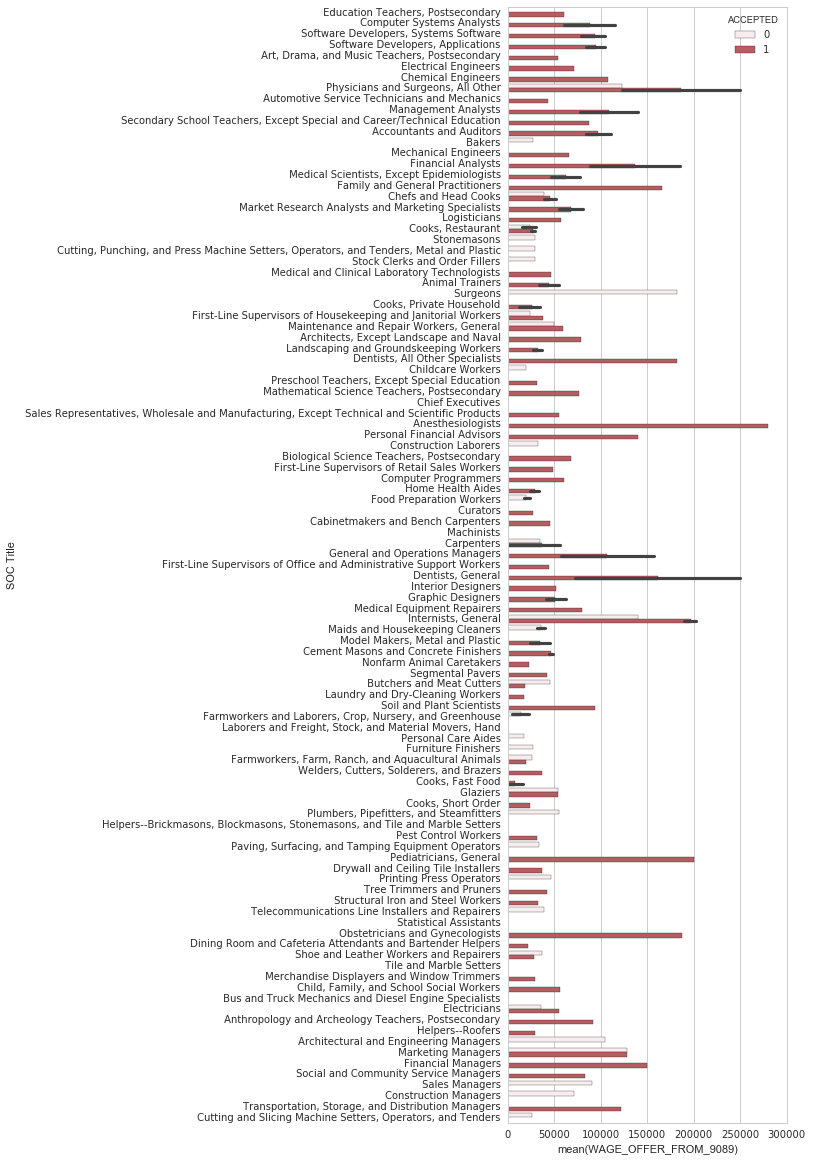

In [231]:
fig, ax = plt.subplots(figsize =(5,20), facecolor='White')
sns.barplot(x='WAGE_OFFER_FROM_9089', y='SOC Title', hue='ACCEPTED', color='r', data=gua, orient='h', ax = ax);